# Analysis

1. Read some data, make some plots 
   

In [1]:
## Imports
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import time, importlib, os
## Put us in the right repo for local relative pathing
__repo__="/g/data/en0/jwg574/repos/simple_fire_metric//"
os.chdir(__repo__)
import fio, plotting

In [7]:
importlib.reload(fio)

ds_daily = fio.ERA5_read_month(['u10','v10','t2m','d2m'],'2019-12')
ds_daily = fio.select_australia(ds_daily)
ds_daily = fio.calc_ffdi(ds_daily)


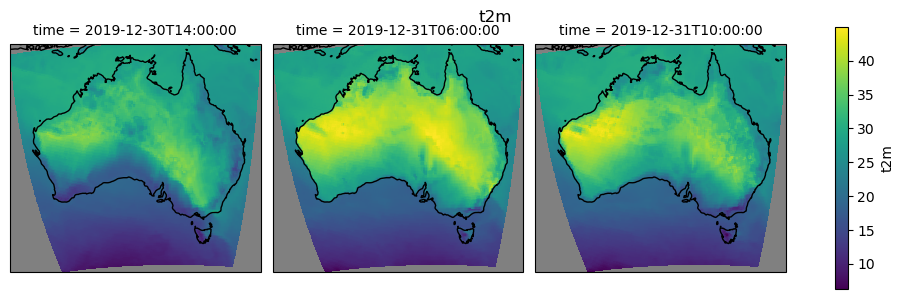

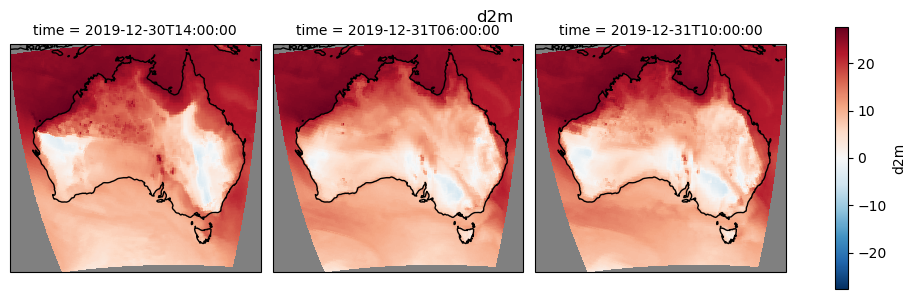

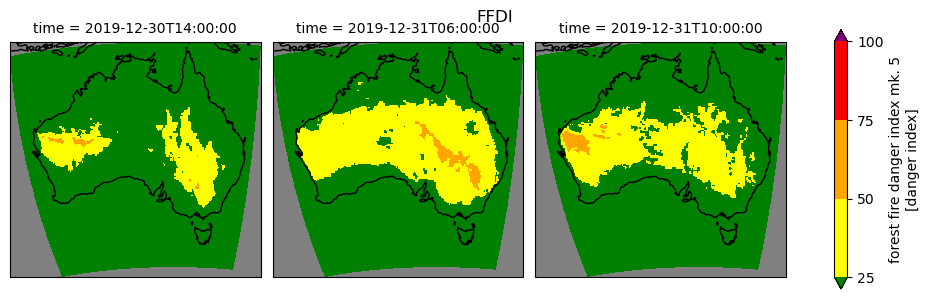

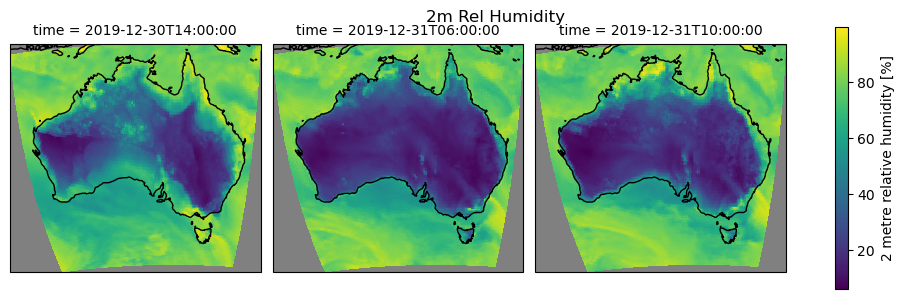

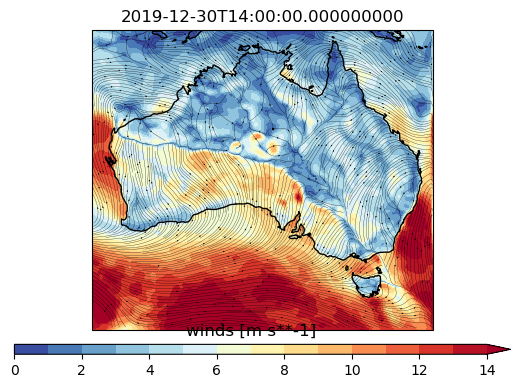

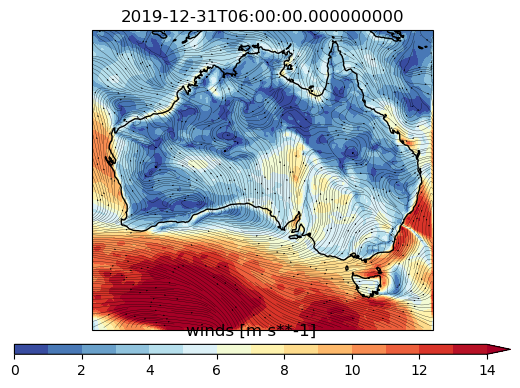

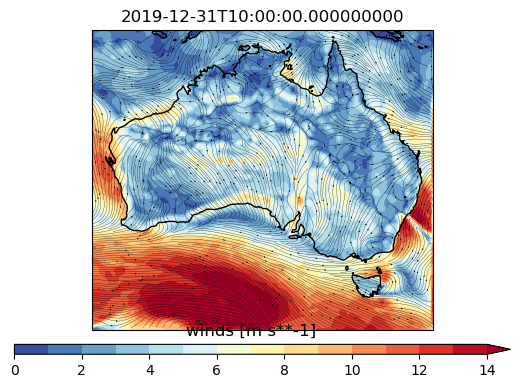

In [8]:
importlib.reload(plotting)

itimes=[-34,-18,-14]

for var in ['t2m','d2m']:
    # celcius instead of kelvin
    plotting.plot_quick(ds_daily[var]-273.15,itimes=itimes,)
    plt.suptitle(var);
    plt.show()
plotting.plot_ffdi(ds_daily['FFDI'],itimes=itimes)
plt.suptitle('FFDI')
plt.show()
plotting.plot_quick(ds_daily['rh2m'],itimes=itimes)
plt.suptitle('2m Rel Humidity')
plt.show()
plotting.plot_winds(ds_daily,itimes=itimes)
    


# PRE and POST 2000 (ERA5)



In [11]:
era5_all = fio.ERA5_read_intermediate("*")
era5_pre2000 = fio.ERA5_read_intermediate("19*")
era5_post2000 = fio.ERA5_read_intermediate("20*")

INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 50 ERA5 monthly max files matching year 19*
INFO: Reading 23 ERA5 monthly max files matching year 20*


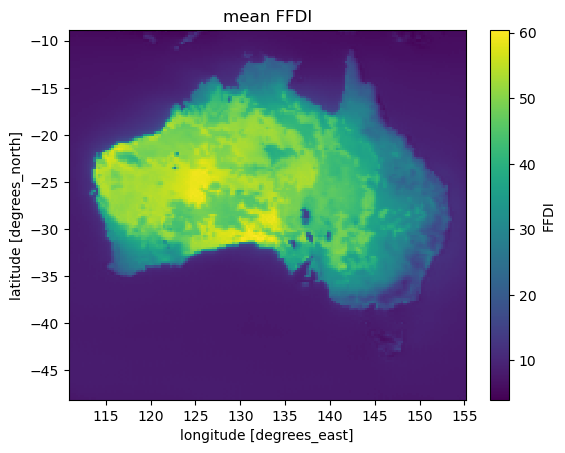

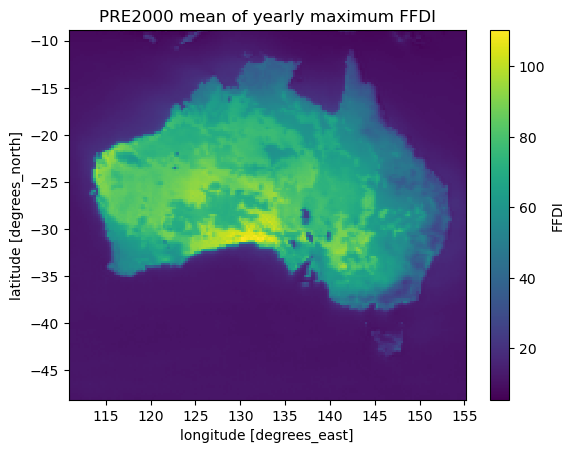

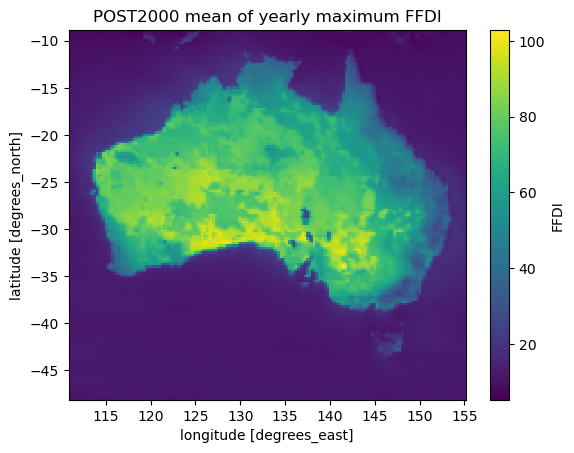

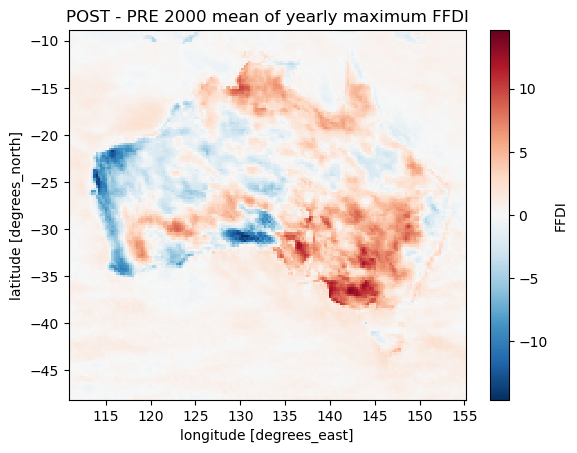

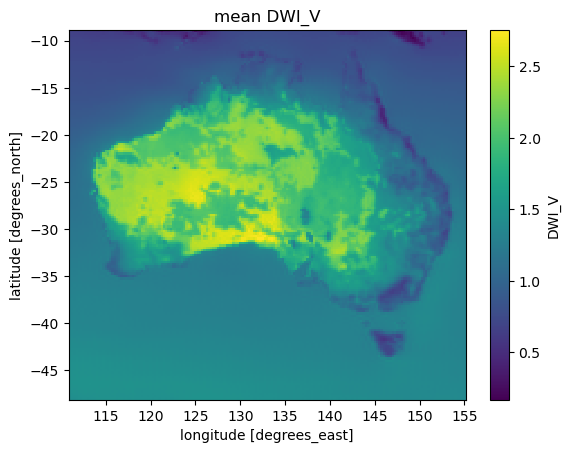

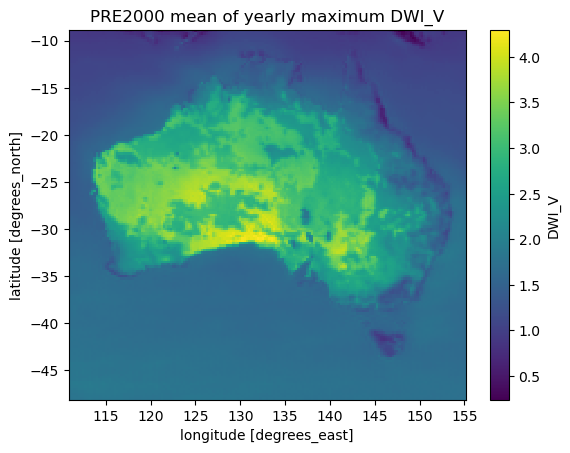

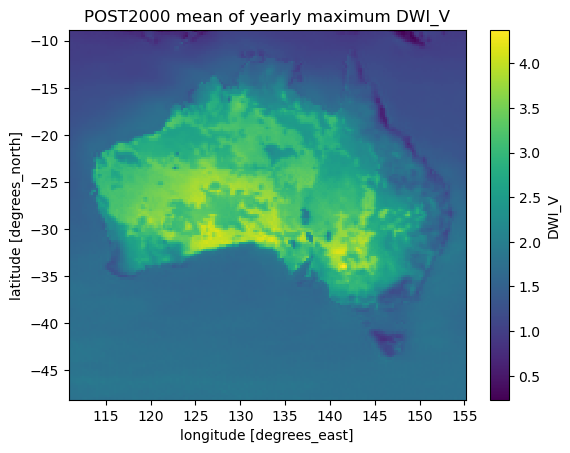

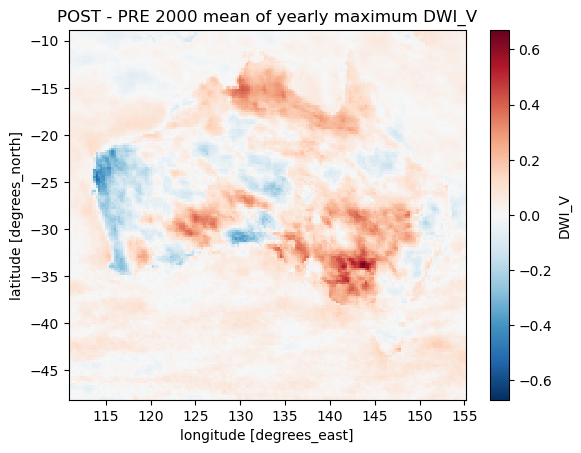

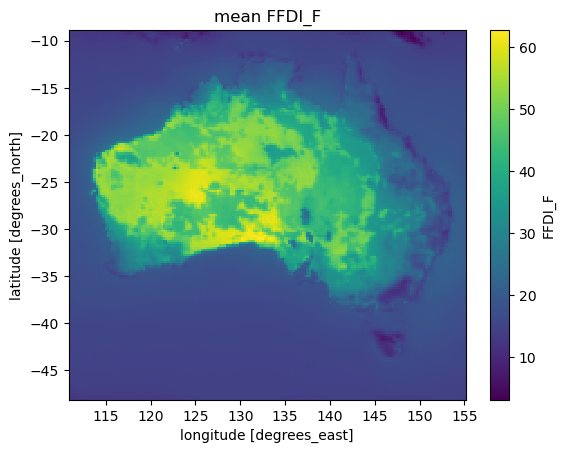

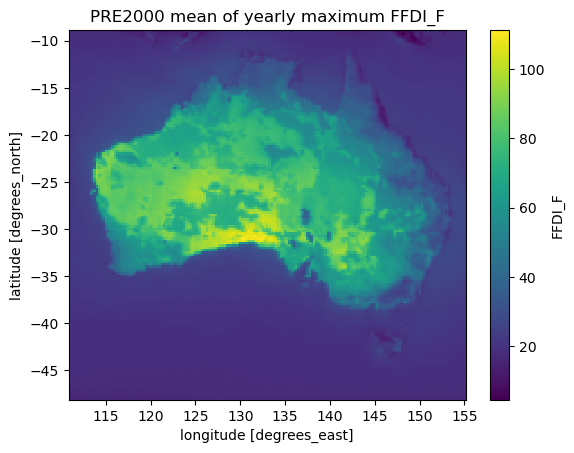

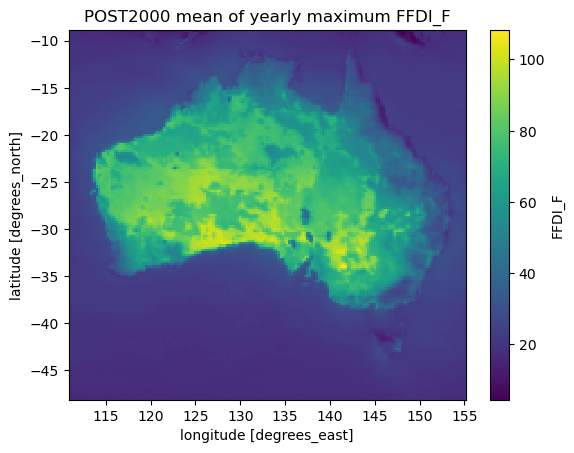

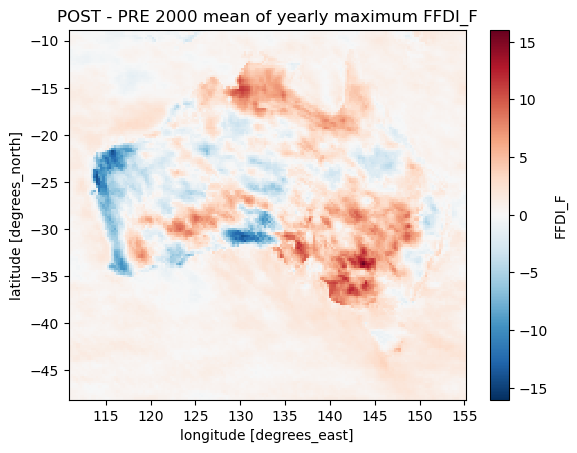

In [15]:
threshs = [12,24,50,100]
threshnames = 't1','t2','t3','t4'
ausmask = fio.get_landmask(era5_pre2000.FFDI)

for metric in ['FFDI','DWI_V','FFDI_F']:
    # show mean/median metric
    era5_all[metric].mean(dim='time').plot()
    plt.title("mean "+metric)
    plt.show()
    plt.close()
    
    ## mean of yearly maximum
    mean_yearly_max_pre2000 = era5_pre2000[metric].resample(time='AS').max(dim='time').mean(dim='time')
    mean_yearly_max_post2000 = era5_post2000[metric].resample(time='AS').max(dim='time').mean(dim='time')
    
    mean_yearly_max_pre2000.plot()
    plt.title('PRE2000 mean of yearly maximum %s'%metric)
    plt.show()
    plt.close()
    
    mean_yearly_max_post2000.plot()
    plt.title('POST2000 mean of yearly maximum %s'%metric)
    plt.show()
    plt.close()

    (mean_yearly_max_post2000 - mean_yearly_max_pre2000).plot()
    plt.title('POST - PRE 2000 mean of yearly maximum %s'%metric)
    plt.show()
    plt.close()



# Forecasts Decadally (BARPA)

In [2]:
barp_20s = fio.BARPA_read_intermediate_years("202*")
barp_30s = fio.BARPA_read_intermediate_years("203*")
barp_40s = fio.BARPA_read_intermediate_years("204*")
barp_50s = fio.BARPA_read_intermediate_years("205*")
barp_60s = fio.BARPA_read_intermediate_years("206*")
barp_70s = fio.BARPA_read_intermediate_years("207*")
barp_80s = fio.BARPA_read_intermediate_years("208*")
barp_90s = fio.BARPA_read_intermediate_years("209*")

INFO: Reading 10 BARPA dailymax files matching year 202*
    :   CMCC-ESM2 ssp370 r1i1p1f1
0.3.0
INFO: Reading 10 BARPA dailymax files matching year 203*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 10 BARPA dailymax files matching year 204*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 10 BARPA dailymax files matching year 205*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 10 BARPA dailymax files matching year 206*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 10 BARPA dailymax files matching year 207*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 10 BARPA dailymax files matching year 208*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 10 BARPA dailymax files matching year 209*
    :   CMCC-ESM2 ssp370 r1i1p1f1


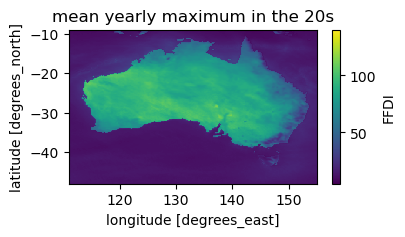

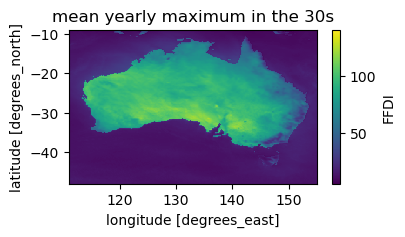

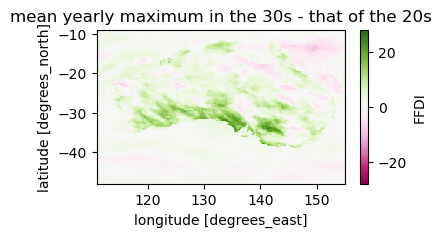

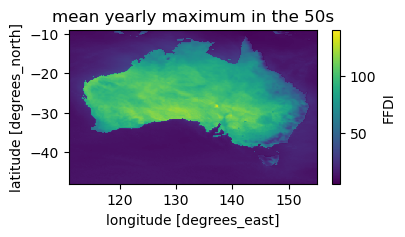

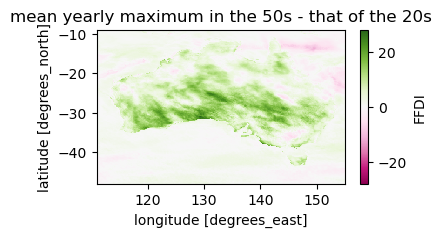

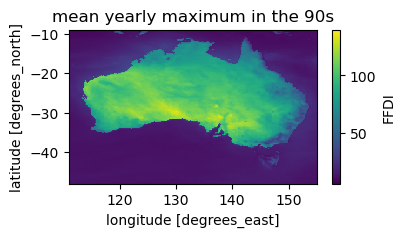

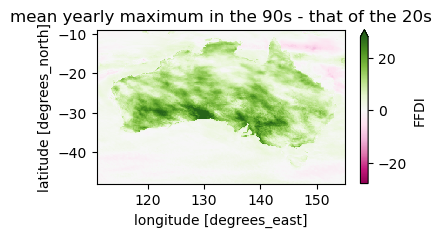

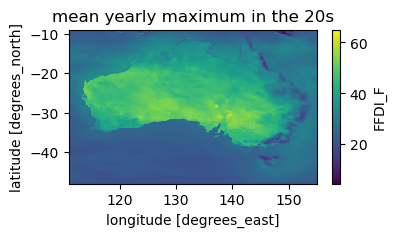

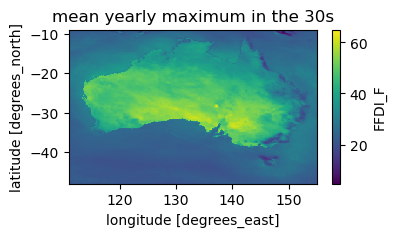

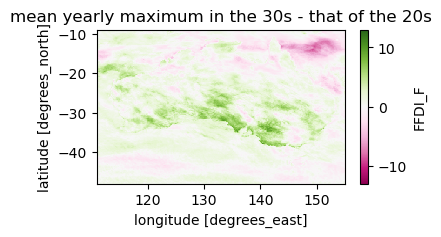

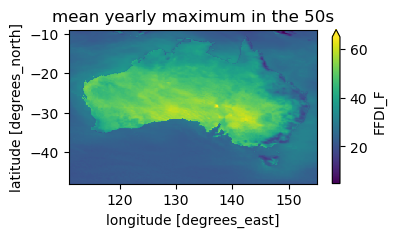

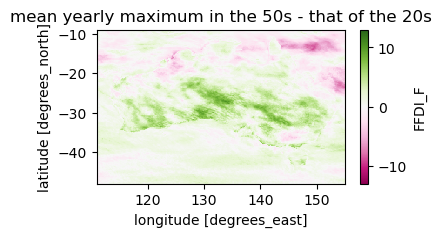

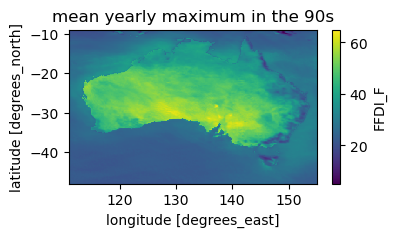

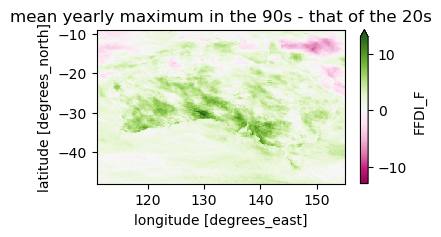

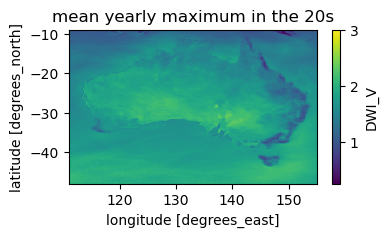

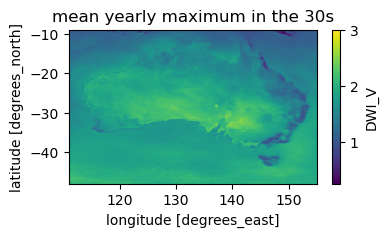

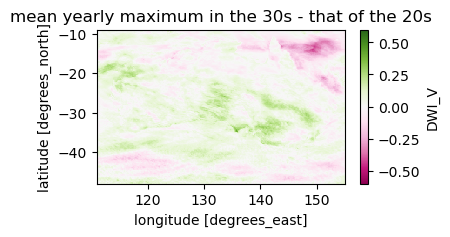

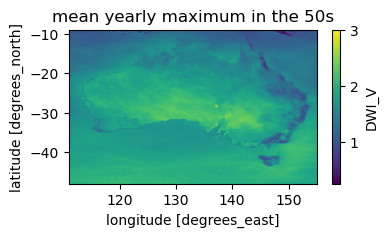

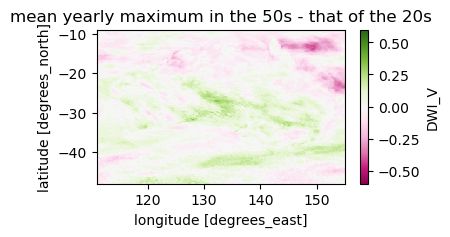

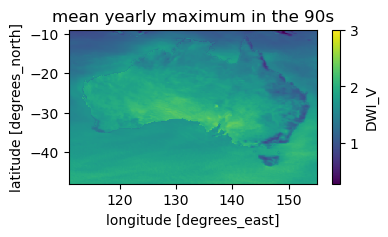

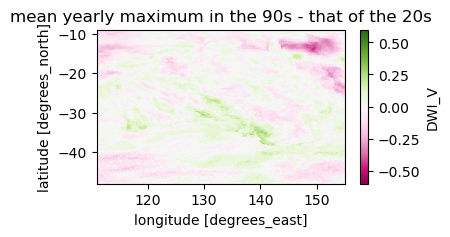

In [3]:
plt.rcParams['figure.figsize'] = [4, 2]

## Mean of yearly maximums
metrics = ['FFDI','FFDI_F','DWI_V']
vmaxes = [140,65,3]

for metric,vmax in zip(metrics,vmaxes):
    mean_20s=barp_20s[metric].resample(time="AS").max().mean(dim='time')
    mean_20s.plot(vmax=vmax)
    plt.title("mean yearly maximum in the 20s")
    plt.show(); plt.close()
    for ds,title in zip([barp_30s,barp_50s,barp_90s,],["30s","50s","90s"]):
        #plt.figure(figsize=[5,4])
        mean_ds = ds[metric].resample(time="AS").max().mean(dim='time')
        mean_ds.plot(vmax=vmax)
        plt.title("mean yearly maximum in the %s"%title)
        plt.show(); plt.close()
        dvmin,dvmax = -0.2 * vmax,0.2*vmax
        (mean_ds-mean_20s).plot(vmin=dvmin,vmax=dvmax, cmap='PiYG')
        plt.title("mean yearly maximum in the %s - that of the 20s"%title)
        plt.show(); plt.close()

# Dowdy emulations

2. First plot:
    - 90th, 95th, 99th,
    - return periods:
        - 1 year returnn period is 99.7th percentie
            - $
10- 2 (1/365.2*5)10= 5 99$
            - 5 yr: .7
    - Additional: difference between 2030s, 2040s, ... in both SSPs in BARP
    - The 90th, 95th and 99th percentiles make more sense if using daily maximumsA


In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [23]:
importlib.reload(fio)

ds = fio.ERA5_read_dailymaximums()
#ds = fio.ERA5_read_intermediate()


In [24]:
print(ds.FFDI.coords)


Coordinates:
  * longitude  (longitude) float32 111.0 111.2 111.5 111.8 ... 154.5 154.8 155.0
  * latitude   (latitude) float32 -9.0 -9.25 -9.5 -9.75 ... -47.5 -47.75 -48.0
  * time       (time) datetime64[ns] 1955-01-01 1955-01-02 ... 2021-12-31


In [26]:
y0,y1 = ds.time.dt.year.values[0],ds.time.dt.year.values[-1]
N_data_per_year = len(ds.time) / (y1-y0+1) # assuming full dataset of 73 years
print(N_data_per_year, 'data per year for ', y0,' to ', y1)

365.25373134328356 data per year for  1955  to  2021


In [27]:
percentiles = [0.9,.95,.99]
#N_data_per_year = 12
#returns = [1-(1/(P*365.2425)) for P in [1,5,10]]
returns = [1-(1/(P*N_data_per_year)) for P in [1,5,10]]
print(percentiles + returns)
qs = percentiles + returns

[0.9, 0.95, 0.99, 0.9972621771820857, 0.9994524354364172, 0.9997262177182086]


In [28]:
%%time
# before doing time calculations rechunk along time dim
ds = ds.chunk(dict(time=-1))

CPU times: user 3.79 ms, sys: 744 µs, total: 4.54 ms
Wall time: 4.22 ms


In [29]:
%%time
#ds # 24472 days, 157 lats, 177 lons
## Percentiles
FORCE=False
# add _m suffix when using monthly
suffix = ''
if N_data_per_year==12:
    suffix = '_m'

url_era_quantiles = "/g/data/en0/jwg574/repos/simple_fire_metric/data/ERA5_percentiles%s.nc"%suffix
if os.path.isfile(url_era_quantiles) and not FORCE:
    print("INFO: Reading:",url_era_quantiles)
    era5_percentiles = xr.open_dataset(url_era_quantiles)
else:

    print("INFO: calculating ffdi percentiles")
    ffdi_percentiles = ds.FFDI.quantile(qs,dim='time')
    print("INFO: calculating DWI_V percentiles")
    dwi_percentiles = ds.DWI_V.quantile(qs,dim='time')
    
    print("INFO: Writing:",url_era_quantiles)
    era5_percentiles = xr.merge([ffdi_percentiles,dwi_percentiles])
    era5_percentiles.to_netcdf(url_era_quantiles)


INFO: Reading: /g/data/en0/jwg574/repos/simple_fire_metric/data/ERA5_percentiles.nc
CPU times: user 11.5 ms, sys: 6.67 ms, total: 18.2 ms
Wall time: 53.7 ms


In [30]:
era5_percentiles

<xarray.Dataset>
Dimensions:    (longitude: 177, latitude: 157, quantile: 6)
Coordinates:
  * longitude  (longitude) float32 111.0 111.2 111.5 111.8 ... 154.5 154.8 155.0
  * latitude   (latitude) float32 -9.0 -9.25 -9.5 -9.75 ... -47.5 -47.75 -48.0
  * quantile   (quantile) float64 0.9 0.95 0.99 0.9973 0.9995 0.9997
Data variables:
    FFDI       (quantile, latitude, longitude) float64 ...
    DWI_V      (quantile, latitude, longitude) float64 ...

In [21]:

#ffdi_percentiles.where(ausmask).plot(row='quantile')
#ffdi_percentiles.where(ausmask).plot.contour(levels=[12,24,50,60,70,80,90,100],row='quantile',add_colorbar=False,colors='k')

def dowdy_1(da,
            levels = [25,50,75,100],
            colors = ['yellow','orange','red','purple'],
            vmin=10,
            vmax=105,
            qs=qs,
           ):
    """ da [quantiles,lats,lons] """
    ausmask = fio.get_landmask(da[0])
    crs = ccrs.PlateCarree(central_longitude=140)
    trans = ccrs.PlateCarree()
    fig,axes = plt.subplots(3,2,figsize=[12,9], subplot_kw={'projection': crs})
    for i,q in enumerate(qs):
        da_i = da.where(ausmask)[i]

        # progress down columns
        ax = axes.T.flatten()[i]
        plt.sca(ax)
        cm1 = plt.pcolormesh(da_i.longitude,da_i.latitude,da_i,vmin=vmin, vmax=vmax, transform=trans)
        cm2 = plt.contour(da_i.longitude,da_i.latitude,da_i, levels=levels, colors=colors, transform=trans)
        ax.coastlines()
        
        plt.title('quantile=%.2f'%q)
        if i>2:
            plt.title('return period = %d'%([1,5,10][i-3]))
        #plt.show()
    plt.tight_layout()
    # add axis for colorbar
    ax = fig.add_axes([.48,.3,.04,.4]) # [xmin,ymin,dx,dy]
    plt.sca(ax)
    # add colorbar
    cb = plt.colorbar(cm1, pad=0.01, cax=ax)
    for cline,color in zip(levels,colors):
        cb.ax.plot([0, 1], [cline]*2, color)
    return


INFO: Figure saved:  figures/dowdy1_ffdi.png
INFO: Figure saved:  figures/dowdy1_dwi.png


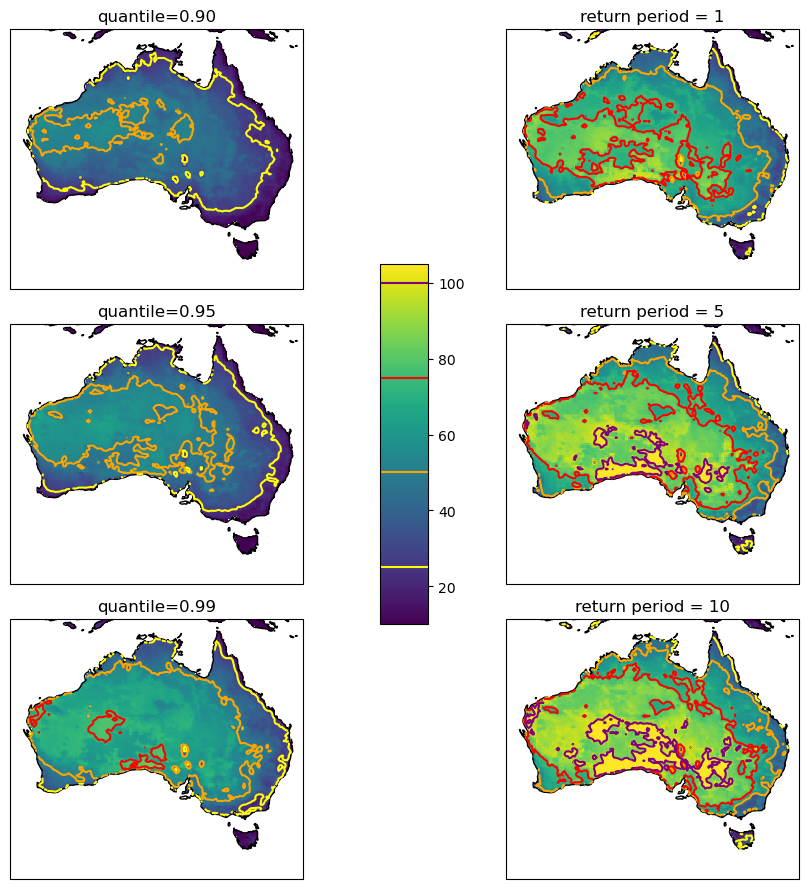

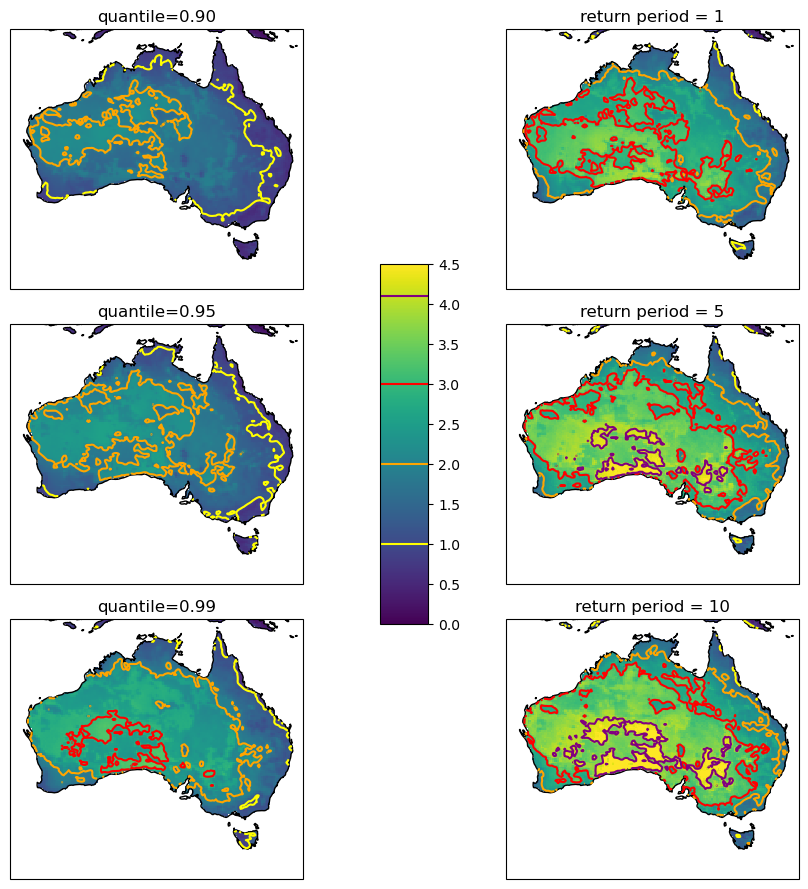

In [31]:
dowdy_1(era5_percentiles.FFDI)
fname = "figures/dowdy1_ffdi%s.png"%suffix
print("INFO: Figure saved: ",fname)
plt.savefig(fname)
dowdy_1(era5_percentiles.DWI_V,
        levels=[1,2,3,4.1],
        colors=['yellow','orange','red','purple'],
       vmin=0,vmax=4.5,)
fname = "figures/dowdy1_dwi%s.png"%suffix
print("INFO: Figure saved: ",fname)
plt.savefig(fname)

# Check Black Summer FFDI

In [22]:
#ds_2021=ds_yearly.isel({'time':-2})
#ds_2020=ds_yearly.isel({'time':-3})

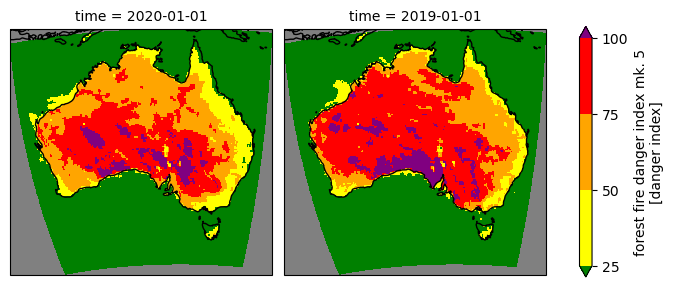

In [21]:

plotting.plot_ffdi(ds_yearly.FFDI,itimes=[-2,-3])
plt.show()

# Look at seasonal trends?

In [8]:
pct_90 = era5_percentiles.sel(quantile=.9)
era5_is_over_90 = ds.FFDI > pct_90.FFDI
era5_days_over_90 = era5_is_over_90.resample(time='QS-DEC').sum()

In [9]:
era5_days_over_90.shape

(269, 157, 177)

In [17]:
quarterly_days_over_90 = era5_days_over_90.mean(dim=['latitude','longitude'])

Text(0, 0.5, 'mean over 90pct')

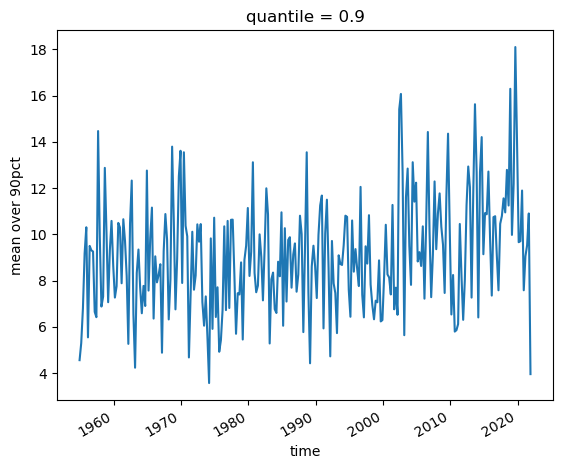

In [18]:
quarterly_days_over_90.plot()
plt.ylabel('mean over 90pct')


(744, 157, 177)
(6, 157, 177)


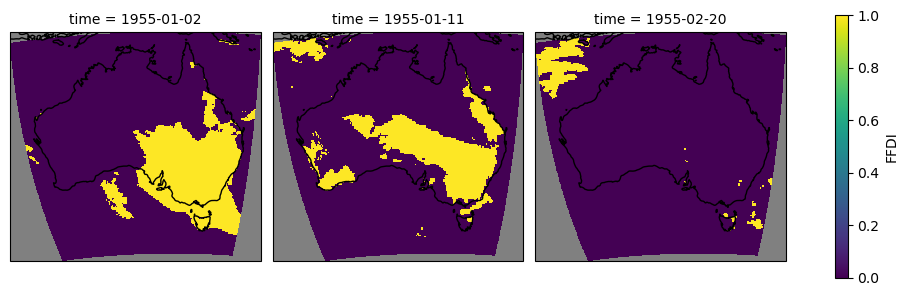

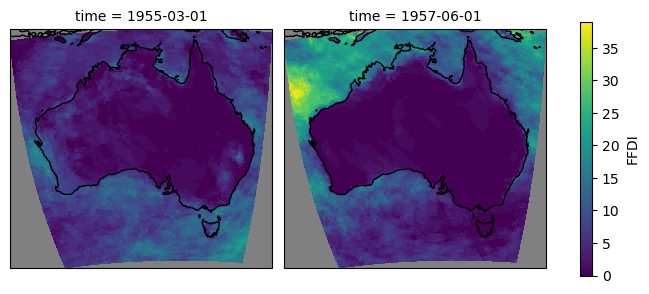

In [52]:

print(ds_daily.FFDI.shape)
print(era5_percentiles.FFDI.shape)
plotting.plot_quick(era5_is_over_90, itimes=[1,10,50]) # check sensible
plotting.plot_quick(era5_days_over_90, itimes=[1,2]) # check sensible

# Time series looking at Capital cities
1. show gcm/scenario FFDI,DWI_V time series for various cities
    - try daily/monthly/yearly
    - maybe there's a way to do spread from the GCMs?
2. add ERA5 as historical time series

In [40]:
importlib.reload(fio)

<module 'fio' from '/g/data/en0/jwg574/repos/simple_fire_metric/fio.py'>

In [41]:
latlons = fio.TIMESERIES_LOCATIONS
# eg: {"Melb":{
#         "latlon":[-37.6722, 144.8503], # airport latlon
#         "yx_barpa":[103,368],
#         "yx_era":[115, 135],
#         "color":"magenta",
#         }, ...
places=[]
colors=[]
for (name,deets) in latlons.items():
    places.extend([name])
    colors.extend([deets['color']])

In [42]:
## Get index matching location
# A 2D plot of the SPEED variable, assigning the coordinate values,
# and plot the verticies of each point
## Test with one time step
ds_20s = fio.BARPA_read_intermediate_years("202*")
ds = ds_20s.FFDI[0]

for (name,deets) in latlons.items():
    lat,lon = deets['latlon']
    abslat = np.abs(ds.lat-lat)
    abslon = np.abs(ds.lon-lon)
    c = np.maximum(abslon, abslat)
    ([xloc], [yloc]) = np.where(c == np.min(c))

    print(name,lat,lon)
    print("    ilat, ilon:", yloc,xloc)
    print("    model lat,lon:", ds.lat.values[yloc],ds.lon.values[xloc])


INFO: Reading 10 BARPA dailymax files matching year 202*
    :   CMCC-ESM2 ssp370 r1i1p1f1
Melb -37.6722 144.8503
    ilat, ilon: 66 219
    model lat,lon: -37.662 144.89149
Adel -34.9063 138.8397
    ilat, ilon: 84 180
    model lat,lon: -34.881 138.866
Sydn -33.8 150.7
    ilat, ilon: 91 257
    model lat,lon: -33.7995 150.7625
Darw -12.464 130.85
    ilat, ilon: 229 128
    model lat,lon: -12.4785 130.832
Dar2 -12.71 131.1
    ilat, ilon: 228 130
    model lat,lon: -12.633 131.14099


In [38]:
ds_cmcc = fio.BARPA_read_intermediate_years("2*")
ds_cmcc_hist = fio.BARPA_read_intermediate_years("*",experiment='historical')
print(ds_cmcc.coords)
print(ds_cmcc_hist.coords)

INFO: Reading 86 BARPA dailymax files matching year 2*
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 55 BARPA dailymax files matching year *
    :   CMCC-ESM2 historical r1i1p1f1
Coordinates:
  * lat      (lat) float64 -47.86 -47.7 -47.55 -47.4 ... -9.389 -9.234 -9.079
  * lon      (lon) float64 111.1 111.2 111.4 111.5 ... 154.5 154.6 154.8 154.9
  * time     (time) datetime64[ns] 2015-01-15 2015-02-15 ... 2100-12-15
Coordinates:
  * lat      (lat) float64 -47.86 -47.7 -47.55 -47.4 ... -9.389 -9.234 -9.079
  * lon      (lon) float64 111.1 111.2 111.4 111.5 ... 154.5 154.6 154.8 154.9
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2014-12-15


In [43]:
ds_ts = {}
for place in places:
    ilat,ilon = latlons[place]['yx_barpa']
    # resample monthly max
    da_h = ds_cmcc_hist.FFDI.isel(lat=ilat).isel(lon=ilon)
    da = ds_cmcc.FFDI.isel(lat=ilat).isel(lon=ilon)
    ds_ts[place] = xr.merge([da_h,da]).load()
    

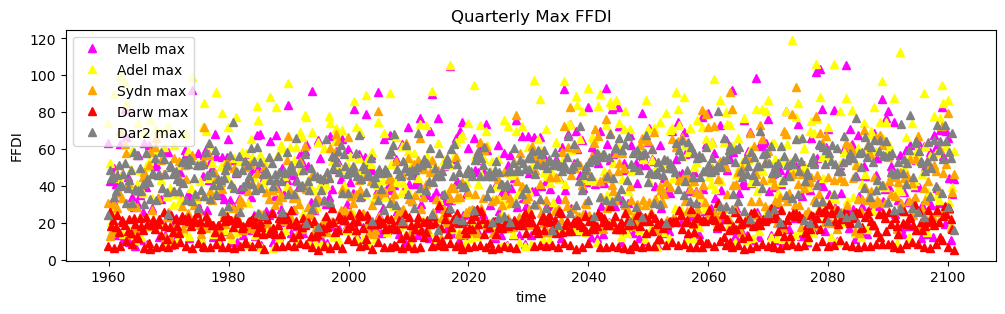

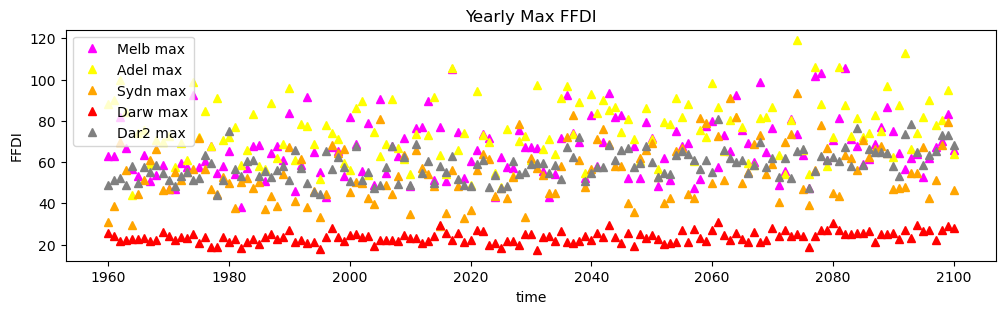

In [47]:
plt.figure(figsize=[12,3])
for place,color in zip(places,colors):
    ds_ts[place].FFDI.resample(time='QS-DEC').max().plot.line('^',color=color, label=place+' max')
    #print(ds_ts[place].resample(time='M').max())
    #ds_ts[place].resample(time='M').quantile(0.75).plot.line('-',color=color, label=place+' q=.75')
plt.title('Quarterly Max FFDI')
plt.legend()

plt.figure(figsize=[12,3])
for place,color in zip(places,colors):
    ds_ts[place].FFDI.resample(time='YS').max().plot.line('^',color=color, label=place+' max')
    #print(ds_ts[place].resample(time='M').max())
    #ds_ts[place].resample(time='M').quantile(0.75).plot.line('-',color=color, label=place+' q=.75')
plt.title('Yearly Max FFDI')
plt.legend()

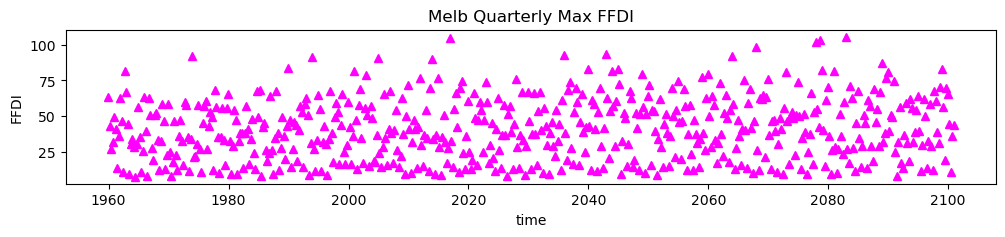

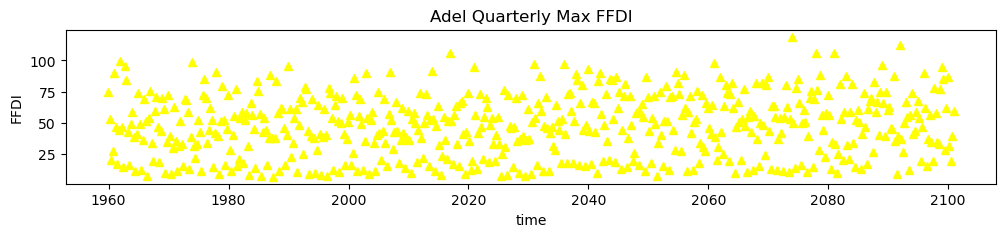

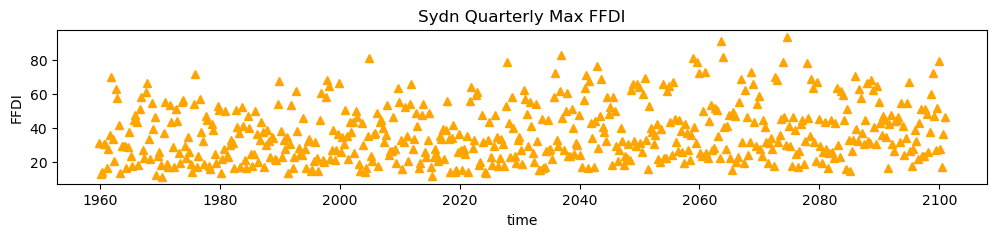

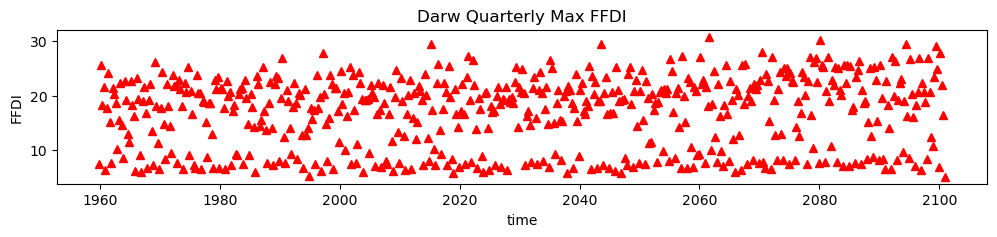

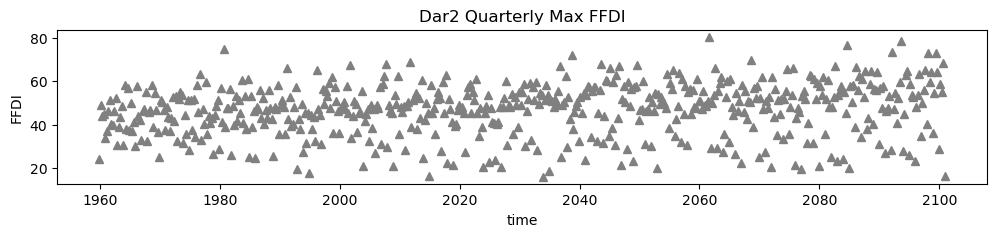

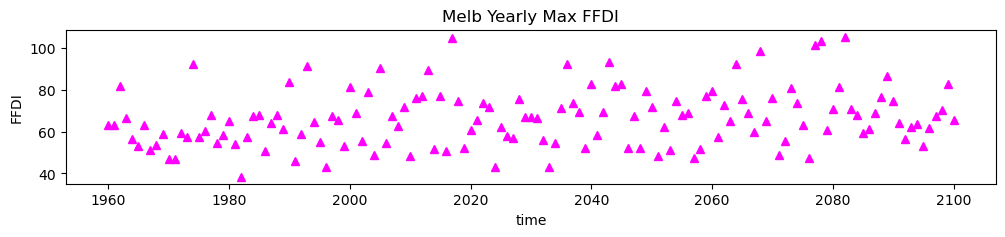

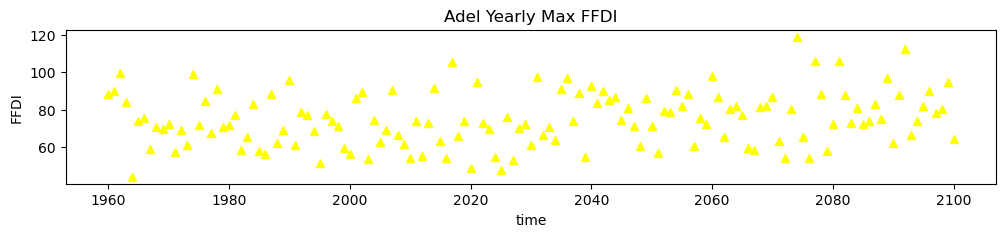

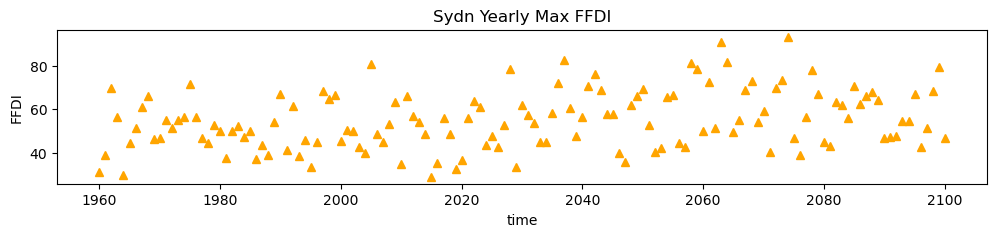

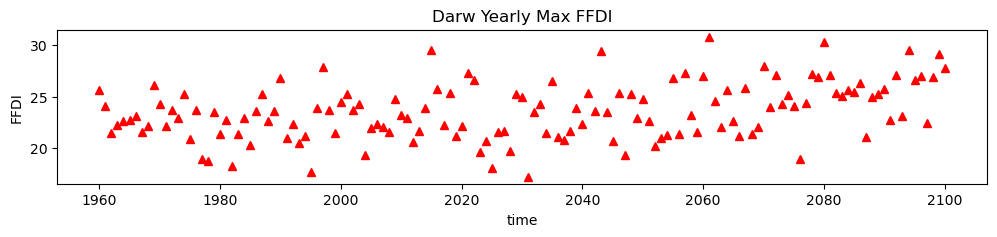

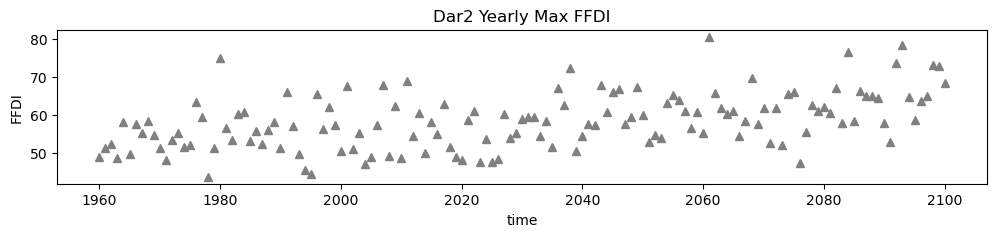

In [48]:
for place,color in zip(places,colors):
    plt.figure(figsize=[12,2])
    ds_ts[place].FFDI.resample(time='QS-DEC').max().plot.line('^',color=color, label=place+' max')
    plt.title('%s Quarterly Max FFDI'%place)
    plt.show()

for place,color in zip(places,colors):
    plt.figure(figsize=[12,2])
    ds_ts[place].FFDI.resample(time='YS').max().plot.line('^',color=color, label=place+' max')
    plt.title('%s Yearly Max FFDI'%place)
    plt.show()

Max, 90th pctile, and mean of time series dataset (which may be monthly maximums already)


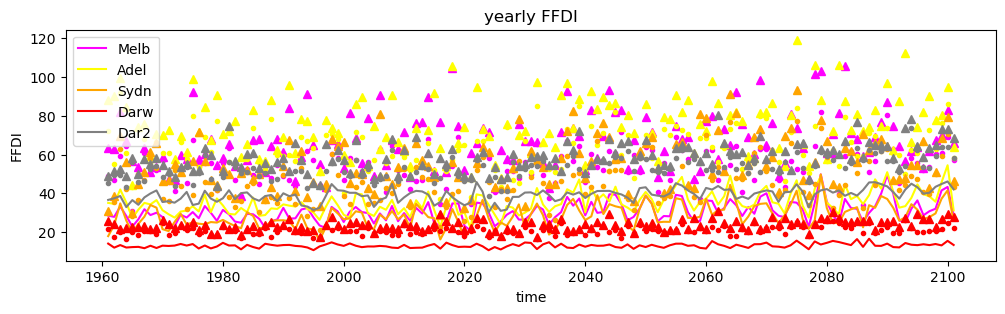

In [49]:

print("Max, 90th pctile, and mean of time series dataset (which may be monthly maximums already)")
plt.figure(figsize=[12,3])
for place,color in zip(places,colors):
    
    ds_ts[place].FFDI.resample(time='Y').max().plot.line('^',color=color,)#label=place+' max')
    ds_ts[place].FFDI.resample(time='Y').quantile(0.9).plot.line('.',color=color,)# label=place+' q=.75')
    ds_ts[place].FFDI.resample(time='Y').mean().plot.line('-',color=color, label=place)
    
plt.title('yearly FFDI')
plt.legend()

## GCMs
- evaluation/historical only
    - "ECMWF-ERA5",
    - "MPI-ESM1-2-HR", 
- with ssp projections:
    - "CMCC-ESM2", # Just ssp370, and hisorical
    - "CSIRO-ACCESS-ESM1-5", # both ssp370,ssp126, others?
- not yet looked at 
    - "CSIRO-ARCCSS-ACCESS-CM2",
    - "EC-Earth-Consortium-EC-Earth3",
    - "NCAR-CESM2","CSIRO-ACCESS-ESM1-5",
    - "NCC-NorESM2-MM",

## experiments

- "evaluation": 1979-2020
- "historical": 1960-2014
- "ssp126": 2015-2100
    - Seems to be missing after migration to py18?
- "ssp370": 2015-2100

In [51]:
## Get index matching location
latlons=fio.TIMESERIES_LOCATIONS


## Check Resolution
# rename lon,lat to match BARPA
#ds_ERA5 = fio.ERA5_read_dailymaximums().rename({'longitude':'lon','latitude':'lat'})
ds_ERA5 = fio.ERA5_read_intermediate().rename({'longitude':'lon','latitude':'lat'})
ds_cmcc = fio.BARPA_read_intermediate_years("*",experiment='ssp370')


for ds,name in zip([ds_ERA5, ds_cmcc],['era','barpa']):
    print("=======  %s ========"%name)
    
    for (place,deets) in latlons.items():
        lat,lon = deets['latlon']
        abslat = np.abs(ds.lat-lat)
        abslon = np.abs(ds.lon-lon)
        c = np.maximum(abslon, abslat)
        ([xloc], [yloc]) = np.where(c == np.min(c))
    
        print(place,lat,lon)
        print("    ilat, ilon: %d, %d"%(yloc,xloc))
        print("    %s lat,lon:"%name, ds.lat.values[yloc],ds.lon.values[xloc])
    


print("=============== resolution check ============")
print("ERA5: ",ds_ERA5.dims,)
print("    DX:", ds_ERA5.lon.values[1]-ds_ERA5.lon.values[0])
print("    DY:", ds_ERA5.lat.values[1]-ds_ERA5.lat.values[0])
print("BARPA: ", ds_cmcc.dims,) 
print("    DX: %.4f"%(ds_cmcc.lon.values[1]-ds_cmcc.lon.values[0]))
print("    DY: %.4f"%(ds_cmcc.lat.values[1]-ds_cmcc.lat.values[0]))

INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 86 BARPA dailymax files matching year *
    :   CMCC-ESM2 ssp370 r1i1p1f1
=======  era ========
Melb -37.6722 144.8503
    ilat, ilon: 115, 135
    era lat,lon: -37.75 144.75
Adel -34.9063 138.8397
    ilat, ilon: 104, 111
    era lat,lon: -35.0 138.75
Sydn -33.8 150.7
    ilat, ilon: 99, 159
    era lat,lon: -33.75 150.75
Darw -12.464 130.85
    ilat, ilon: 14, 79
    era lat,lon: -12.5 130.75
Dar2 -12.71 131.1
    ilat, ilon: 15, 80
    era lat,lon: -12.75 131.0
=======  barpa ========
Melb -37.6722 144.8503
    ilat, ilon: 66, 219
    barpa lat,lon: -37.662 144.89149
Adel -34.9063 138.8397
    ilat, ilon: 84, 180
    barpa lat,lon: -34.881 138.866
Sydn -33.8 150.7
    ilat, ilon: 91, 257
    barpa lat,lon: -33.7995 150.7625
Darw -12.464 130.85
    ilat, ilon: 229, 128
    barpa lat,lon: -12.4785 130.832
Dar2 -12.71 131.1
    ilat, ilon: 228, 130
    barpa lat,lon: -12.633 131.14099
=============== resolution check

# Reading Time series (and saving for faster reload)
- Time series: N_series = N_models x N_metrics x N_locations
    - Models: ERA5, several BARPA instances,
    - Metrics: FFDI, FFDI_F, and DWI_V
    - Locations: melb, adelaide, sydney, darwin
        - Darwin has big mismatch between ERA5 and BARPA
            - could be due to grid size (ERA5 is .25, BARPa is .15) giving more ocean or inland area
            - need to add driving metrics to timeseries
    
  

In [57]:
from fio import ERA5_read_intermediate,BARPA_read_intermediate_years, TIMESERIES_LOCATIONS
import warnings, pickle

def get_time_series(locname, force_renew=False, verbose=False):
    """ Pass in locname from TIMESERIES_LOCATIONS keys 
        reads FFDI, FFDI_F, DWI_V time series from ERA5 and several BARPA runs
        uses intermediate pickle file if possible, otherwise requires barpa daily maximum intermediates to have been created
    """
    assert locname in TIMESERIES_LOCATIONS.keys(), "%s not in list: %s"%(locname, str(TIMESERIES_LOCATIONS.keys()))
    
    # first check if file already created
    fname = 'data/timeseries_%s.pickle'%(locname)
    if not force_renew and os.path.isfile(fname):
        # read and return file data
        print("INFO: %s found, reading data"%fname)
        with open(fname,'rb') as ts_file:
            ts_dict = pickle.load(ts_file)
        return ts_dict

    # Otherwise we create the time series
    ## READ ERA5
    # rename lon,lat to match BARPA
    #ds_ERA5 = ERA5_read_dailymaximums().rename({'longitude':'lon','latitude':'lat'})
    ds_ERA5 = ERA5_read_intermediate().rename({'longitude':'lon','latitude':'lat'})
    
    ## READ BARPA
    ## Read ssp370, and historical for CMCC GCM
    ds_cmcc = BARPA_read_intermediate_years("*",experiment='ssp370')
    ds_cmcc_hist = BARPA_read_intermediate_years("*",experiment='historical')
    list_ds = [ds_cmcc_hist, ds_cmcc]
    list_models = ["%s_%s_CMCC_hist","%s_%s_CMCC_370"]
    ## Read ssp370 and ssp126, and historical for CMCC GCM
    #ds_esm1_126 = BARPA_read_intermediate_years("*",
    #                                            gcm="CSIRO-ACCESS-ESM1-5",
    #                                            experiment="ssp126",
    #                                            realisation="r6i1p1f1",)
    #ds_esm1_370 = BARPA_read_intermediate_years("*",
    #                                             gcm="ACCESS-ESM1-5",
    #                                             experiment="ssp370",
    #                                             realisation="r6i1p1f1",
    #                                            )
    #list_ds.extend([ds_esm1_126,ds_esm1_370])
    #list_model.extend(['%s_%s_CSIRO_ESM_370','%s_%s_CSIRO_ESM_126'])
    
    y_era,x_era = TIMESERIES_LOCATIONS[locname]['yx_era']
    y_barpa,x_barpa = TIMESERIES_LOCATIONS[locname]['yx_barpa']
    ts_places = {}
    
    ## Loop over metric here: FFDI, FFDI_F, DWI_V
    for metric in ['FFDI','DWI_V' ,'FFDI_F']: # for now not ffdi_f
        ## Can loop over barpa models
        for barpa_model, descriptor in zip(list_ds,list_models):
            ts_name = descriptor%(locname,metric)
            if verbose:
                print("INFO: Loading ",ts_name)
            TS = barpa_model[metric][:,y_barpa,x_barpa].load()
            ## some barpa data uses no leap years, non-standard calendar
            ## may be slightly out of sync with reality, I think that is why null values get put in?
            if isinstance(TS.indexes['time'],xr.CFTimeIndex):
                with warnings.catch_warnings(): # ignore calendar conversion warnings
                    warnings.simplefilter("ignore")
                    TS_dti = TS.indexes['time'].to_datetimeindex()
            else:
                TS_dti=TS.indexes['time']
            ## Store as pandas time series, removing nans
            TS_pd = pd.Series(TS.values,index=TS_dti)
            if verbose:
                print("INFO: dropping %d null values from %s"%(TS_pd.isnull().sum(),ts_name))
            ts_places[ts_name] = TS_pd.dropna()
    
        if verbose:
            print("Loading ERA_5")
        TSE=ds_ERA5[metric][:,y_era,x_era].load()
        ts_places['%s_%s_ERA5'%(locname,metric)] = pd.Series(TSE.values,TSE.indexes['time'])

    with open(fname,'wb') as ts_file:
        print("INFO: Saving %s"%fname)
        pickle.dump(ts_places,ts_file)
    
    return ts_places

In [58]:
%%time
importlib.reload(fio)
## takes ~40 seconds for new file creation
## Uses up to 4 GB RAM ish?
ts_melb = get_time_series("Melb",force_renew=True,verbose=True)

INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 86 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 55 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 historical r1i1p1f1
INFO: Loading  Melb_FFDI_CMCC_hist
INFO: dropping 0 null values from Melb_FFDI_CMCC_hist
INFO: Loading  Melb_FFDI_CMCC_370
INFO: dropping 0 null values from Melb_FFDI_CMCC_370
Loading ERA_5
INFO: Loading  Melb_DWI_V_CMCC_hist
INFO: dropping 0 null values from Melb_DWI_V_CMCC_hist
INFO: Loading  Melb_DWI_V_CMCC_370
INFO: dropping 0 null values from Melb_DWI_V_CMCC_370
Loading ERA_5
INFO: Loading  Melb_FFDI_F_CMCC_hist
INFO: dropping 0 null values from Melb_FFDI_F_CMCC_hist
INFO: Loading  Melb_FFDI_F_CMCC_370
INFO: dropping 0 null values from Melb_FFDI_F_CMCC_370
Loading ERA_5
INFO: Saving data/timeseries_Melb.pickle
CPU times: user 8.18 s, sys: 1.81 s, total: 9.98 s
Wall time: 39.5 s


In [60]:
ts_melb.keys()

dict_keys(['Melb_FFDI_CMCC_hist', 'Melb_FFDI_CMCC_370', 'Melb_FFDI_ERA5', 'Melb_DWI_V_CMCC_hist', 'Melb_DWI_V_CMCC_370', 'Melb_DWI_V_ERA5', 'Melb_FFDI_F_CMCC_hist', 'Melb_FFDI_F_CMCC_370', 'Melb_FFDI_F_ERA5'])

In [62]:
%%time
# get all the other sites
force_renew=True
ts_melb = get_time_series("Melb",force_renew=force_renew)
ts_adel = get_time_series('Adel',force_renew=force_renew)
ts_darw = get_time_series('Darw',force_renew=force_renew)
ts_sydn = get_time_series('Sydn',force_renew=force_renew)
ts_dar2 = get_time_series('Dar2',force_renew=force_renew)

INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 86 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 55 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 historical r1i1p1f1
INFO: Saving data/timeseries_Melb.pickle
INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 86 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 55 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 historical r1i1p1f1
INFO: Saving data/timeseries_Adel.pickle
INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 86 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 ssp370 r1i1p1f1
INFO: Reading 55 BARPA years (of monthly maximums) matching year *
    :   CMCC-ESM2 historical r1i1p1f1
INFO: Saving data/timeseries_Darw.pickle
INFO: Reading 73 ERA5 monthly max files matching year *
INFO: Reading 86 BARPA years (of mo

In [63]:
#ts_places
from pylab import rcParams
import warnings # want to ignore calendar conversion warnings
from datetime import datetime

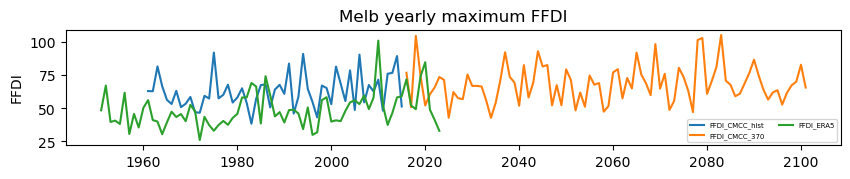

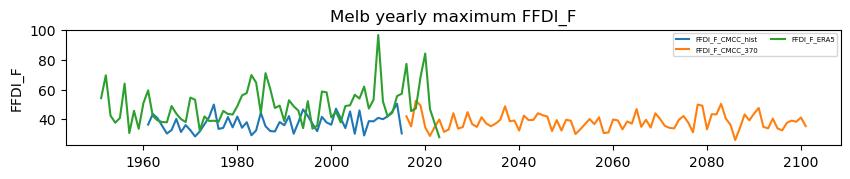

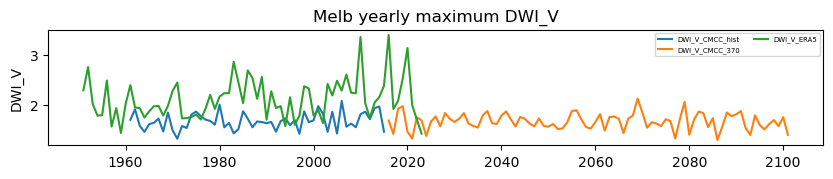

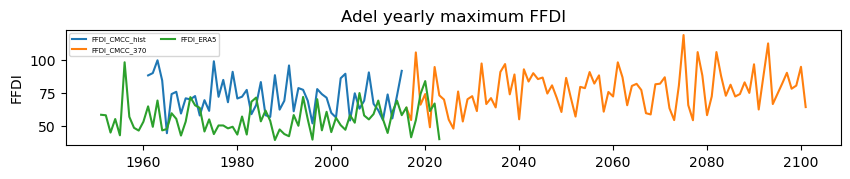

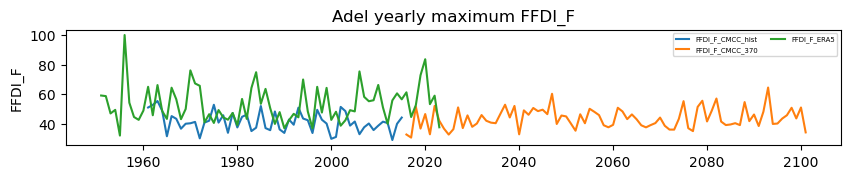

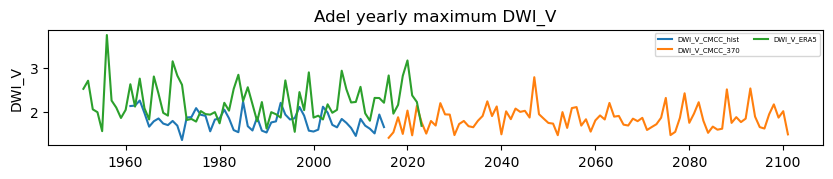

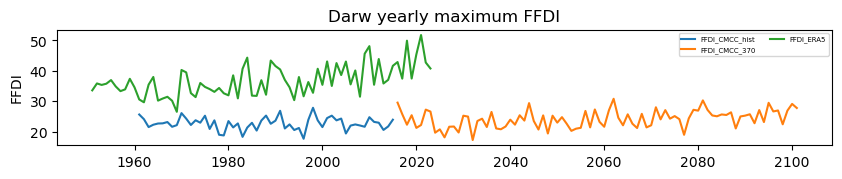

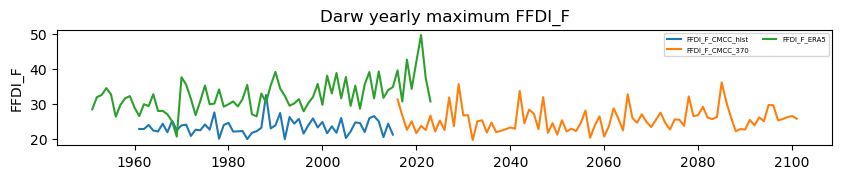

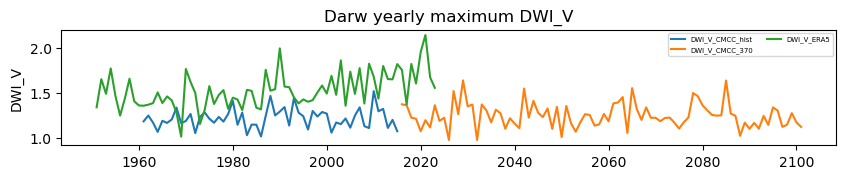

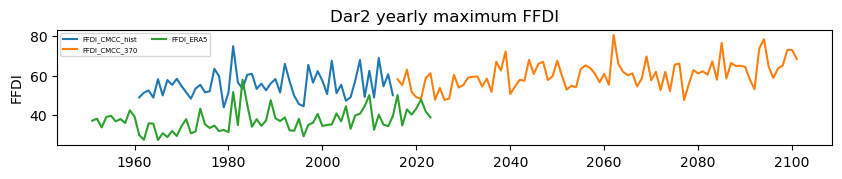

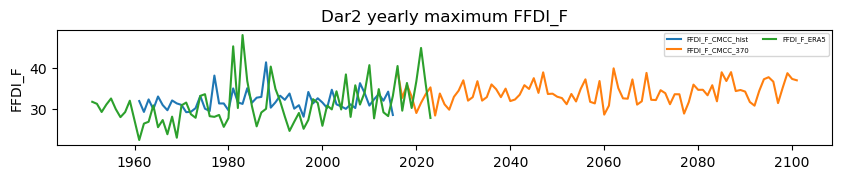

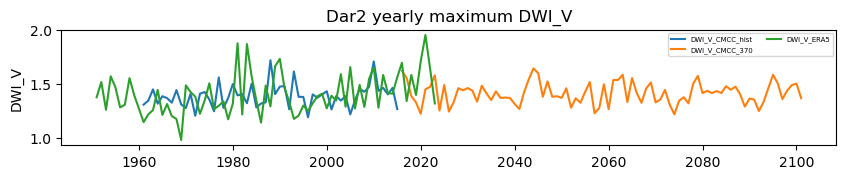

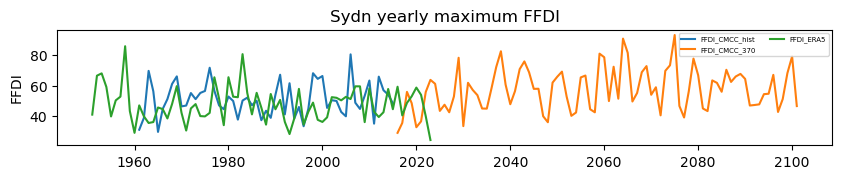

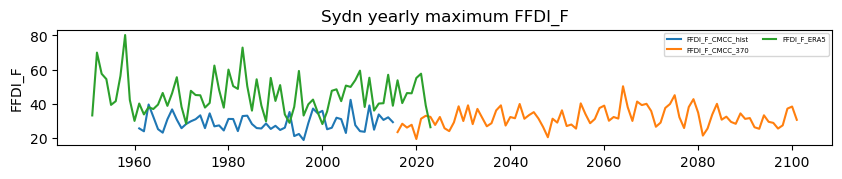

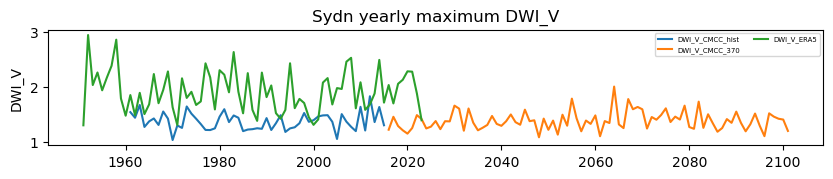

In [64]:
rcParams['figure.figsize'] = 10, 1.5
## Show each place on one plot

ts_places = [ts_melb,ts_adel,ts_darw,ts_dar2,ts_sydn]
for ts in ts_places:
    for metric in ['FFDI','FFDI_F','DWI_V',]:
        
        for name,da in ts.items():
            # only one metric at a time
            if not (metric in name):
                continue
            # unfortunately FFDI is a subset of FFDI_F
            if metric == 'FFDI':
                if 'FFDI_F_' in name:
                    continue
            yearly_max = da.resample('Y').quantile(1.0)
            x = yearly_max.index
            y = yearly_max.values
            #print(yearly_max)
            plt.plot_date(x,y,'-',label=name[5:])
        placename=name[:4]
                
        plt.title(placename+' yearly maximum '+metric)
        plt.ylabel(metric)
        plt.legend(ncol=2,fontsize=5)
        plt.show()
    
    #plt.title("FFDI")
    #plt.xlim([np.datetime64('1960-01-01'),np.datetime64('2101-01-01')])

## Diff between FFDI_F and FFDI

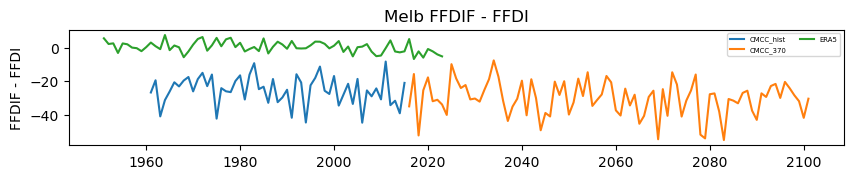

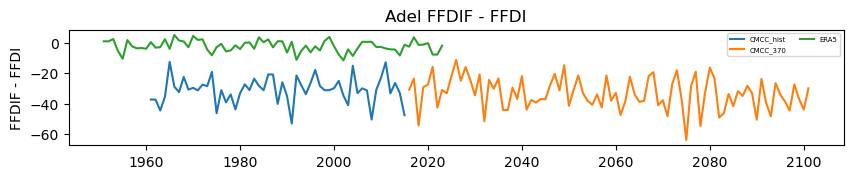

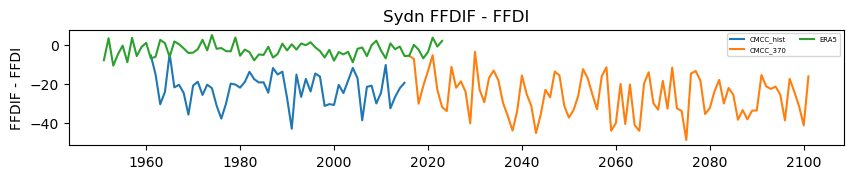

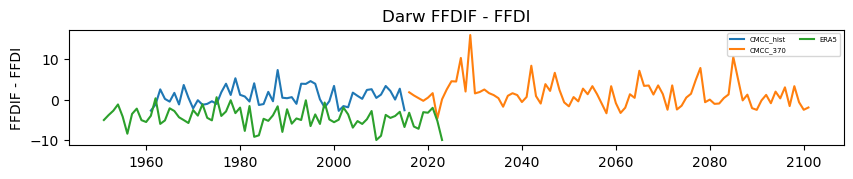

In [65]:
ts_places = [ts_melb,ts_adel,ts_sydn,ts_darw]
ts_names = ['Melb','Adel', 'Sydn','Darw']
diffs = {}
for ts,locname in zip(ts_places,ts_names):
    for key in ['_FFDI_CMCC_hist', '_FFDI_CMCC_370', '_FFDI_ERA5', ]:
        ffdiname = locname+key
        diffname = ffdiname[:4]+"_diff_"+ffdiname[10:]
        ffdifname = ffdiname[:9]+"_F"+ffdiname[9:]
        #print(diffname, ffdifname)
        ffdi = ts[ffdiname].resample('Y').quantile(1.0)
        ffdif = ts[ffdifname].resample('Y').quantile(1.0)
        diff = ffdif-ffdi
        diffs[diffname] = diff 

    for name,ts in diffs.items():
        
        x = ts.index
        y = ts.values
        plt.plot_date(x,y,'-',label=name[10:])
        
        plt.title("%s FFDIF - FFDI"%name[:4])
    plt.ylabel("FFDIF - FFDI")
    plt.legend(ncol=2,fontsize=5)
    plt.show()
    diffs={}
    #plt.title("FFDI")
    #plt.xlim([np.datetime64('1960-01-01'),np.datetime64('2101-01-01')])